# predicting heart disease using machine learning

this notebook looks into using various python-based machine learning (ML) and data science libraries in an attempt to build a ML model capable of predicting whether or not someone has heart disease based on their medical attributes.

step-by-step:
1. problem definition
2. data
3. evaluation
4. features
5. modelling
6. experimentation

## 1. problem definition

> given clinical parameters about a patient, can we predict whether or not somone has heart disease?

## 2. data

the original data came from Cleavland data from the <a href="https://archive.ics.uci.edu/dataset/45/heart+disease">UCI machine learning repo</a>. there's a version availabile on <a href="https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data">kaggle</a>.

## 3. evaluation

> if we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept (POC), we'll pursue the project.

## 4. features
more information about the data we'll be using:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   - serum = LDL + HDL + .2 * triglycerides
   - above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
        can range from mild symptoms to severe problems
        signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
        Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    - colored vessel means the doctor can see the blood passing through
    - the more blood movement the better (no clots)
13. thal - thalium stress result
    - 1,3: normal
    - 6: fixed defect: used to be defect but ok now
    - 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## preparing the tools
we're using pandas, matplotlib and numpy for data analysis and manipulation

In [82]:
# importing the tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

## load data

In [46]:
df = pd.read_csv("heart-disease.csv")
df.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [47]:
df.shape

(303, 14)

## data exploration (aka exploratory data analysis (EDA))

the goal heere's to find out more about the data and become the SME on it.

a checklist
1. what question(s) are we trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing and how to deal with it?
4. where are the outliers and why should we care about them?
5. how can we add, change, or remove features to get more out of the data?

In [48]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

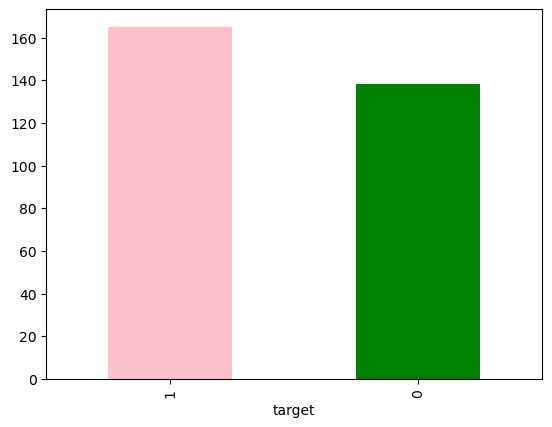

In [49]:
df["target"].value_counts().plot(kind="bar", color=["pink", "green"]);

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [51]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### heart disease frequency according to sex

In [52]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [53]:
# compare target column with sex solumn
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


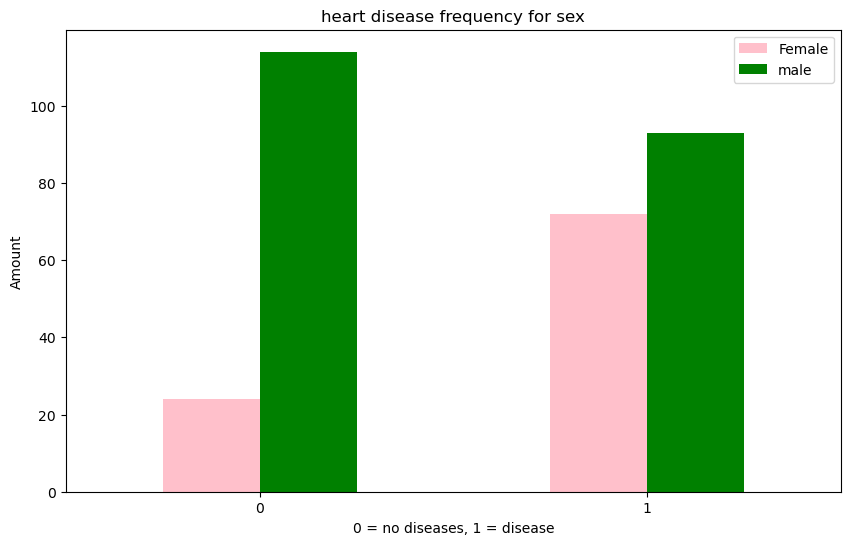

In [54]:
# creat a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["pink", "green"]);
plt.title("heart disease frequency for sex")
plt.xlabel("0 = no diseases, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "male"])
plt.xticks(rotation=0);

### age vs max heart rate for heart disease

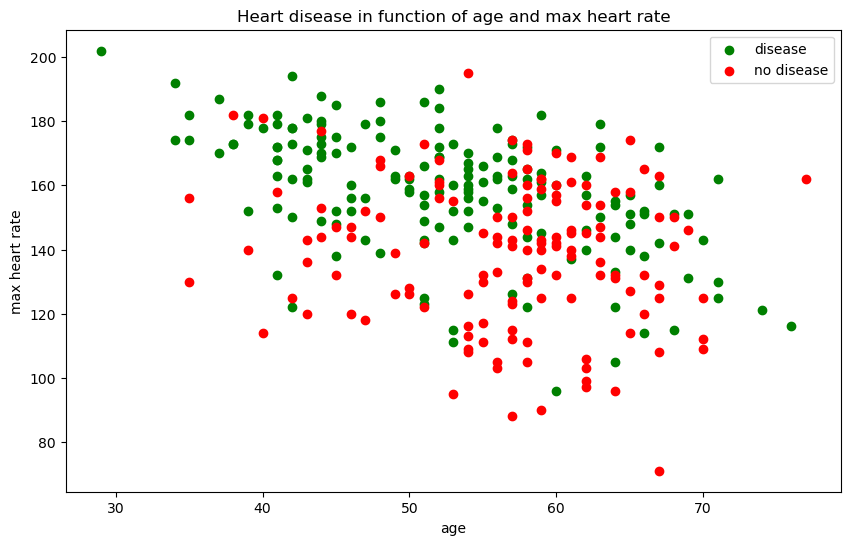

In [55]:
# create another figure
plt.figure(figsize=(10,6))

# scatter with positives examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="green")

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="red");

# add some helpful info
plt.title("Heart disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["disease", "no disease"]);

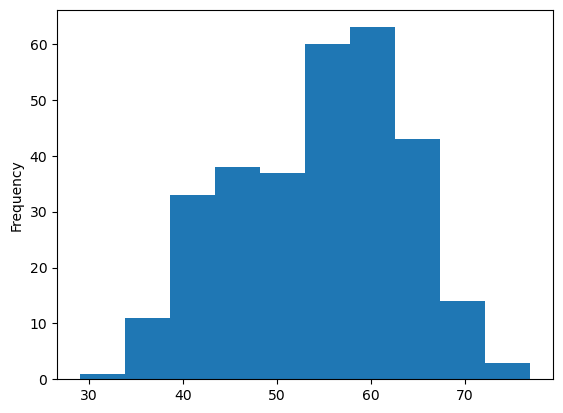

In [56]:
# check the distribution of age with a histogram

df.age.plot.hist();

## heart disease frequency per chest pain type

In [57]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


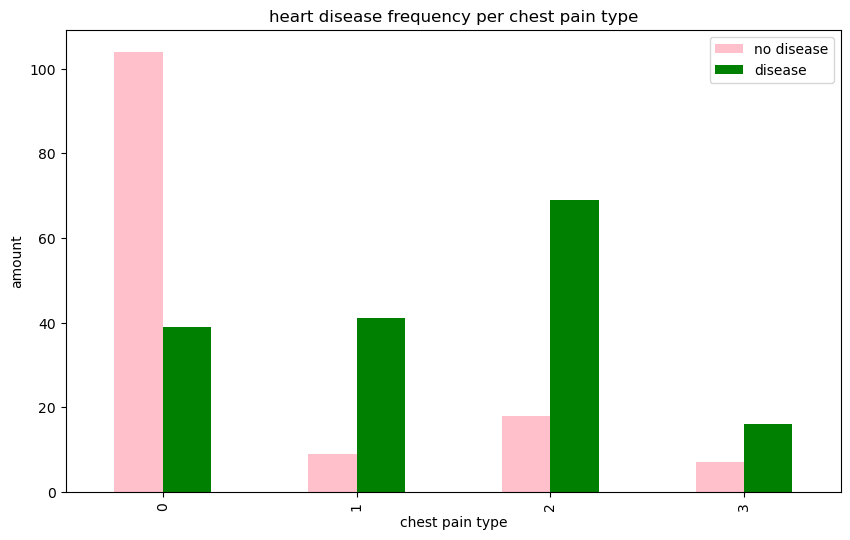

In [58]:
# visualizing the crosstab
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["pink", "green"])

plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("amount")
plt.legend(["no disease", "disease"]);

In [59]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


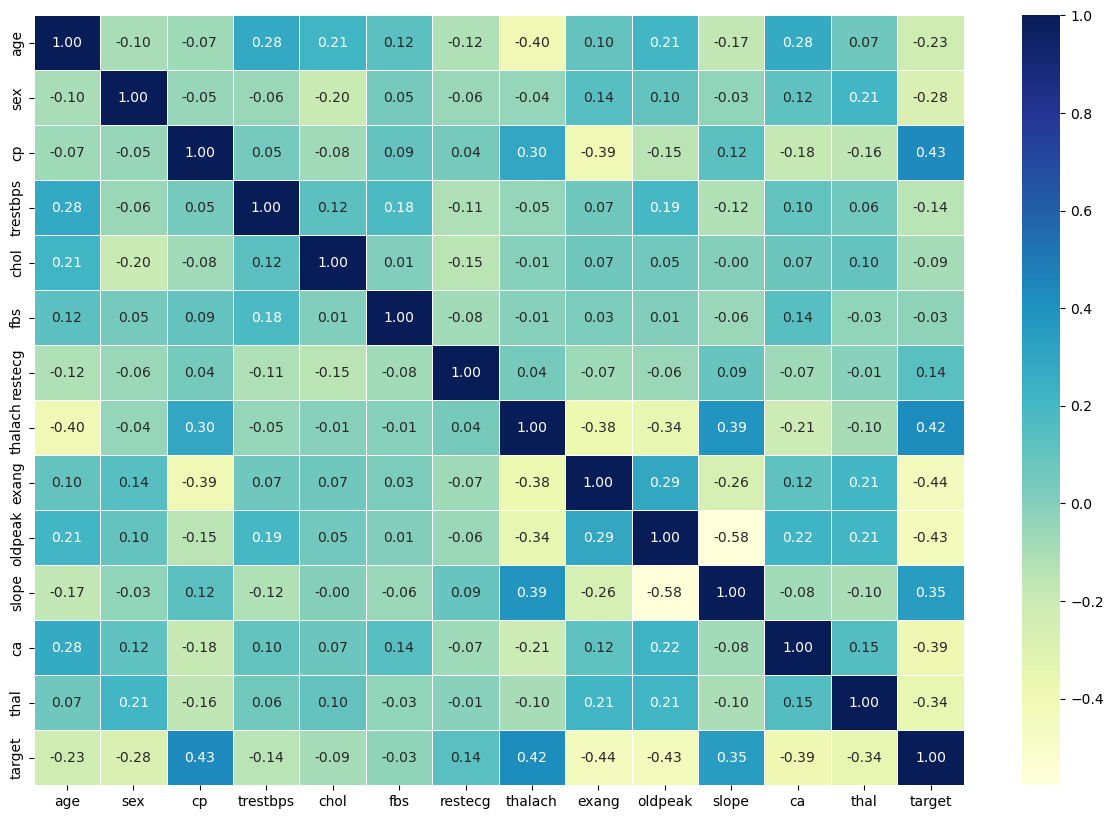

In [60]:
# make it more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");

higher positive value = higher possible positive correlation

## 5. modelling

In [61]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
# split data into X & y
X = df.drop("target", axis=1)
y = df["target"]

In [63]:
# training split into train and test

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

now with the data split, time to build ML model.

going to try 3 different models:
1. logisitic regression
2. kneighbors
3. randomforestclassifier

In [64]:
# models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates given ML models.
    models: a dictionary of different ML models via sklearn
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit the model
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores    

In [65]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/briguz/Desktop/jojo/ml-course/env/coursework/heart-disease-project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

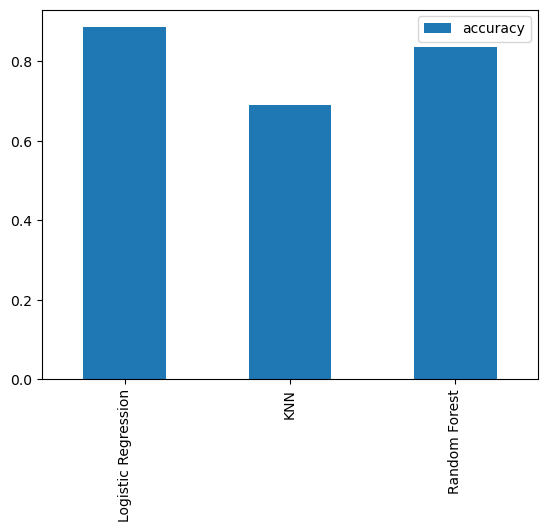

In [66]:
# visualizing the scores
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

looking at the following to **improve** the model:
- hyperparameter tuning
- feature importance
- confusion matrixc
- cross-validation
- precision
- recall
- f1 score
- classification report
- roc curve
- auc

### 5.a: hyperparameter tuning

tuning KNN first

In [67]:
train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1,21)

# setup knn instance
knn = KNeighborsClassifier()

# loop through
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(X_train, y_train)
    
    #update the training, test scores list
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [68]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Maximum KNN score on the test data: 75.41%


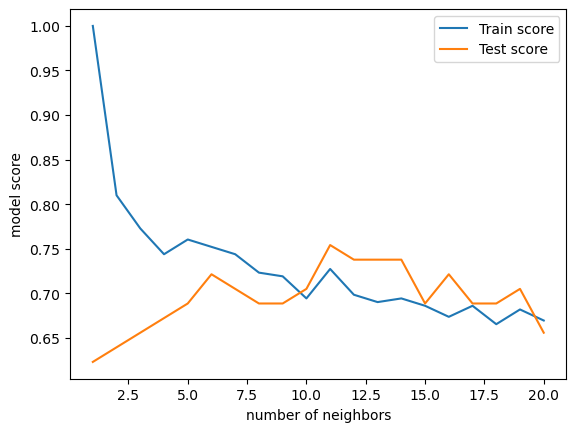

In [69]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("number of neighbors")
plt.ylabel("model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### 5.b: hyperparameter tuning via RandomizedSearchCV

In [70]:
# creata a hyperparameter grid for logisiticregression
log_grid = {"C": np.logspace(-4, 4, 20),
           "solver": ["liblinear"]}

# create same but for randomforest
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

with our grids created, let's tune via RSCV!

In [71]:
# tune logisiticregression
np.random.seed(42)

#setup random hyperparams search for LR
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_grid,
                                cv=5,
                                verbose=True)

#fit the search
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [72]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [73]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

now time for randomforest!

In [74]:
# tune RFC
np.random.seed(42)

#setup random hyperparams search for LR
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                verbose=True)

#fit the search
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [75]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 2,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [76]:
# evaluate the rf model
rs_rf.score(X_test, y_test)

0.8688524590163934

### 5.c: hyperparameter tuning with GridSearchCV

since LogisticRegression is our best model so far, gonna tune and see if we can make it better

In [78]:
# different hyperparams for LR model
# creata a hyperparameter grid for logisiticregression
log_grid = {"C": np.logspace(-4, 4, 30),
           "solver": ["liblinear"]}

# tune logisiticregression
np.random.seed(42)

#setup random hyperparams search for LR
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_grid,
                                cv=5,
                                verbose=True)

#fit the search
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [79]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [80]:
# evaluate grid search LR model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* confusion matrixc
* precision
* recall
* f1 score
* classification report
* roc curve
* auc

... using cross-validation when possible.

to make comparisons and evaluate trained model, we'll make preds first

In [83]:
y_preds = gs_log_reg.predict(X_test)

In [84]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

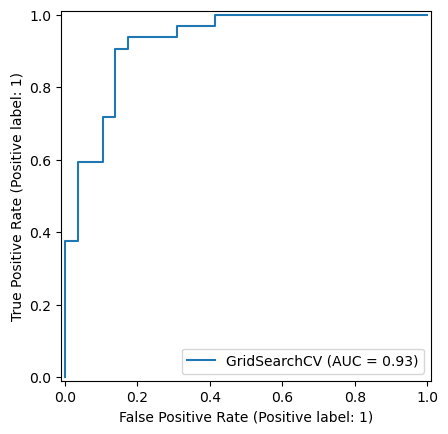

In [85]:
# plot roc curve, calculate AUC metric
RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test,
                               y=y_test
                              );

In [86]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


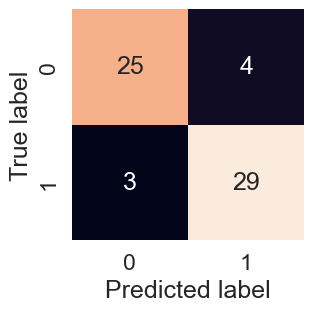

In [90]:
sns.set(font_scale=1.5)
def plot_conf_mat (y_test, y_preds):
    """
    plots a visual of the confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test, y_preds);

now we've got a ROC curve, AUC metric, and confusion matrix.
let's get a classification report with cross-validation precision, recall, f1-score

In [91]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### calculate evaluation metrics using cross-validation
calculating precision, f1, recall via `cross_val_score`

In [92]:
# check best hyperparams
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [93]:
# create new classifier based on best params
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [98]:
# cross-val accuracy, precision, recall, f1
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
mean_cv_acc = np.mean(cv_acc)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
mean_cv_precision = np.mean(cv_precision)

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
mean_cv_recall = np.mean(cv_recall)

cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
mean_cv_f1 = np.mean(cv_f1)

print("the mean of cross-val accuracy is: " + str(mean_cv_acc))
print("the mean of cross-val precision is: " + str(mean_cv_precision))
print("the mean of cross-val recall is: " + str(mean_cv_recall))
print("the mean of cross-val f1_score is: " + str(mean_cv_f1))

the mean of cross-val accuracy is: 0.8446994535519124
the mean of cross-val precision is: 0.8207936507936507
the mean of cross-val recall is: 0.9212121212121213
the mean of cross-val f1_score is: 0.8673007976269721


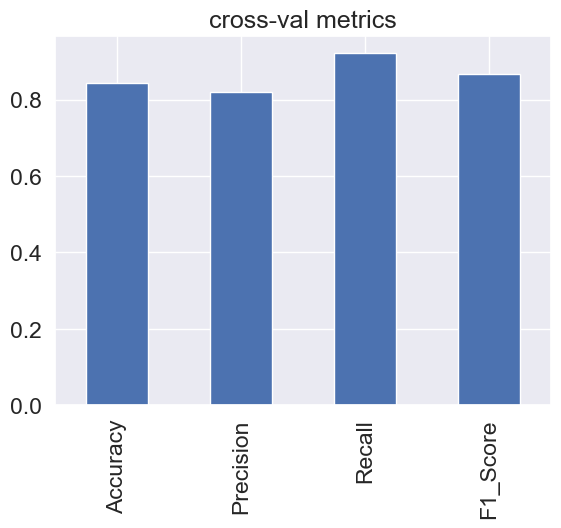

In [102]:
# visualizing the metrics
cv_metrics = pd.DataFrame({"Accuracy": mean_cv_acc,
                          "Precision": mean_cv_precision,
                          "Recall": mean_cv_recall,
                          "F1_Score": mean_cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="cross-val metrics", legend=False);

### feature importance

aka: "which features contributed most to the outcomes of the model and how did they contribute?"

finding feature importance is different based on the model

In [103]:
# fit an instance of LR
clf

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [104]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [106]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [107]:
# match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

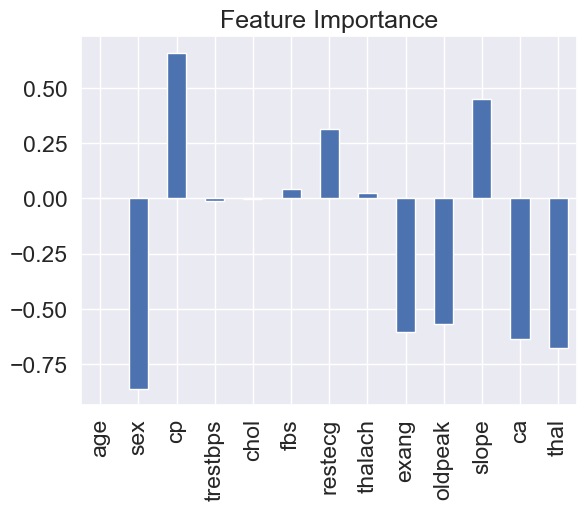

In [109]:
# visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance",
                      legend=False);

In [110]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


## 6. experimentation
if we haven't hit the metric yet, ask...
* could we have more data?
* could we try a better model?
* could we improve the current models more?
* if we hit the metric, how to export and share?